<a href="https://colab.research.google.com/github/nehashukla91/-Python---Data-Structure/blob/main/EDA_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bike Details Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
file_path = '/content/BIKE DETAILS.csv'

import pandas as pd
df = pd.read_csv('/content/BIKE DETAILS.csv')
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


Q1. What is the range of selling prices in the dataset?

In [ ]:
# Calculate the range of selling prices
price_range = df['selling_price'].max() - df['selling_price'].min()

print(f"The range of selling prices is: {price_range}")

The range of selling prices is: 755000


Q2. What is the median selling price for bikes in the dataset?

In [ ]:
# Calculate the median selling price
median_price = df['selling_price'].median()

print(f"The median selling price is: {median_price}")

The median selling price is: 45000.0


Q3. What is the most common seller type?

In [ ]:
most_common_seller = df['seller_type'].mode()[0]  # Access the first element (index 0)

print(f"The most common seller type is: {most_common_seller}")

The most common seller type is: Individual


Q4. How many bikes have driven more than 50,000 kilometers?

In [ ]:
# Assuming 'km_driven' is the column representing kilometers driven.
bikes_over_50k = len(df[df['km_driven'] > 50000])
print(f"The number of bikes that have driven more than 50,000 kilometers is: {bikes_over_50k}")

The number of bikes that have driven more than 50,000 kilometers is: 170


Q5. What is the average km_driven value for each ownership type?

In [ ]:
# Calculate the average km_driven value for each ownership type
average_km_driven_by_ownership = df.groupby('owner')['km_driven'].mean()

average_km_driven_by_ownership

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


Q6. What proportion of bikes are from the year 2015 or older?

In [ ]:
# Calculate the proportion of bikes from 2015 or older
bikes_2015_or_older = len(df[df['year'] <= 2015])
total_bikes = len(df)
proportion_2015_or_older = bikes_2015_or_older / total_bikes

print(f"The proportion of bikes from 2015 or older is: {proportion_2015_or_older}")

The proportion of bikes from 2015 or older is: 0.5664467483506126


Q7. What is the trend of missing values across the dataset?

name                  0.000000
selling_price         0.000000
year                  0.000000
seller_type           0.000000
owner                 0.000000
km_driven             0.000000
ex_showroom_price    40.999057
dtype: float64


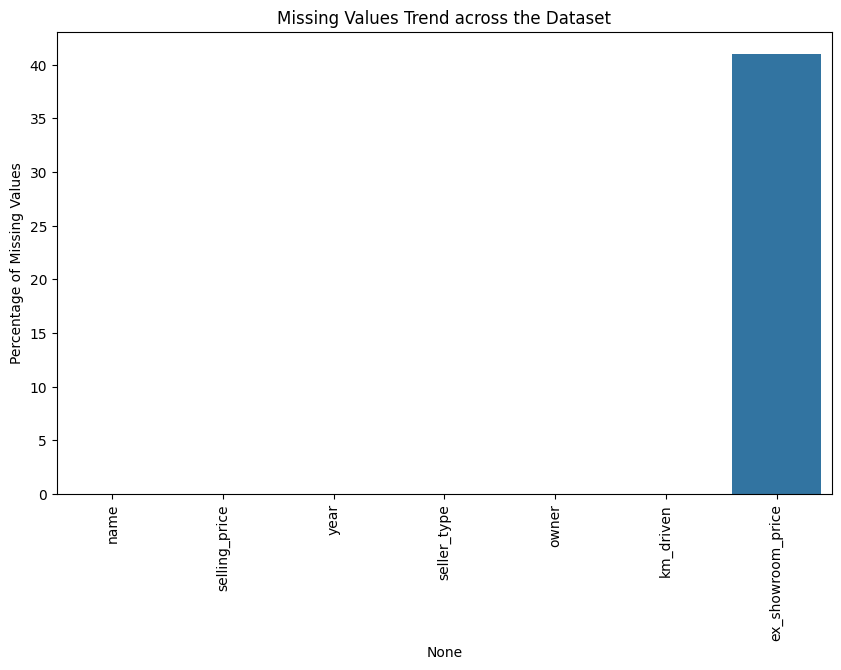

In [ ]:
# Calculate the percentage of missing values for each column
missing_values_percentage = df.isnull().sum() * 100 / len(df)

# Print the results
print(missing_values_percentage)

# You can also visualize the missing values using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values_percentage.index, y=missing_values_percentage.values)
plt.xticks(rotation=90)
plt.ylabel('Percentage of Missing Values')
plt.title('Missing Values Trend across the Dataset')
plt.show()

Q8. What is the highest ex_showroom_price recorded, and for which bike

In [ ]:
# Find the highest ex_showroom_price and the corresponding bike name
highest_price_row = df.loc[df['ex_showroom_price'].idxmax()]

highest_price = highest_price_row['ex_showroom_price']
bike_name = highest_price_row['name']

print(f"The highest ex_showroom_price is: {highest_price} for the bike: {bike_name}")

The highest ex_showroom_price is: 1278000.0 for the bike: Harley-Davidson Street Bob


Q9. What is the total number of bikes listed by each seller type

In [ ]:
# Calculate the total number of bikes listed by each seller type
bike_count_by_seller = df.groupby('seller_type')['name'].count()

bike_count_by_seller

,name
seller_type,
Dealer,6
Individual,1055


Q10. What is the relationship between selling_price and km_driven for first-owner bikes

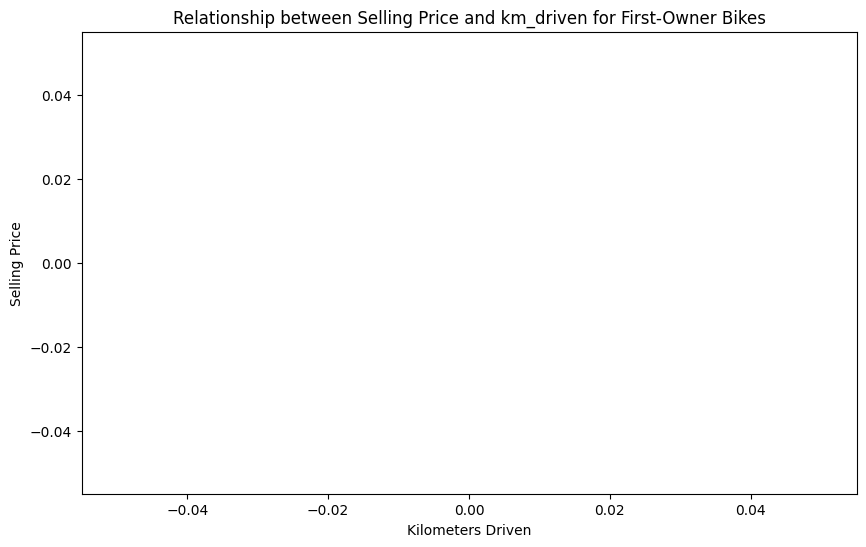

In [ ]:
!pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the bike details

# Filter for first-owner bikes
first_owner_bikes = df[df['owner'] == 'First Owner']

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='km_driven', y='selling_price', data=first_owner_bikes)
plt.title('Relationship between Selling Price and km_driven for First-Owner Bikes')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.show()


Q11. Identify and remove outliers in the km_driven column using the IQR methodB

In [ ]:
# Calculate Q1, Q3, and IQR
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and remove outliers
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# Print the number of outliers removed
print(f"Number of outliers removed: {len(df) - len(df_no_outliers)}")

Number of outliers removed: 39


Q12. Perform a bivariate analysis to visualize the relationship between year and selling_price.

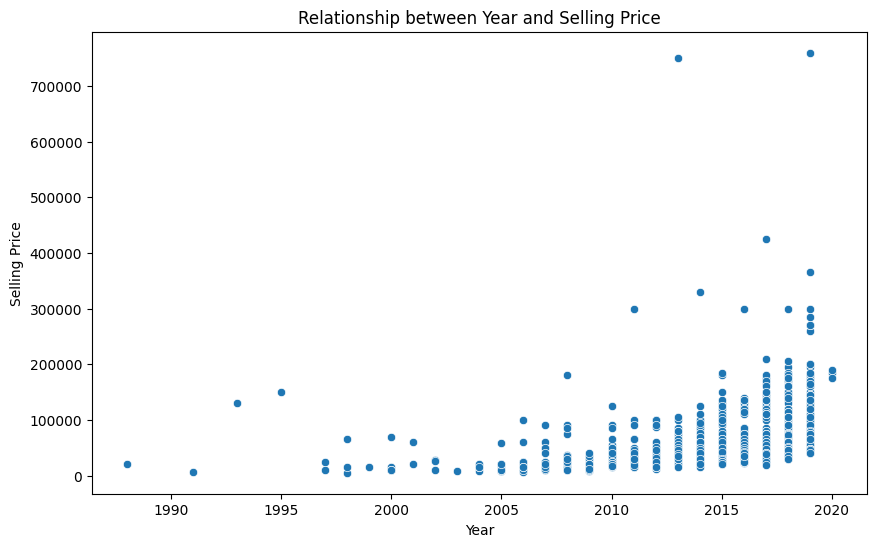

In [ ]:
# Assuming 'df' is your DataFrame containing the bike details

plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='selling_price', data=df)
plt.title('Relationship between Year and Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

Q13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing
year)

bike_age
4     183333.333333
5     119689.511628
6      87660.374046
7      78894.736842
8      58469.018692
9      56500.000000
10     48668.131868
11     51136.986301
12     35748.400000
13     35655.721311
14     31793.333333
15     22267.857143
16     34289.285714
17     24927.586207
18     23380.000000
19     16978.571429
20     15100.000000
21      8000.000000
22     20666.666667
23     40000.000000
24     20833.333333
25     15000.000000
26     28333.333333
27     17500.000000
29    150000.000000
31    130000.000000
33      6000.000000
36     20000.000000
Name: selling_price, dtype: float64


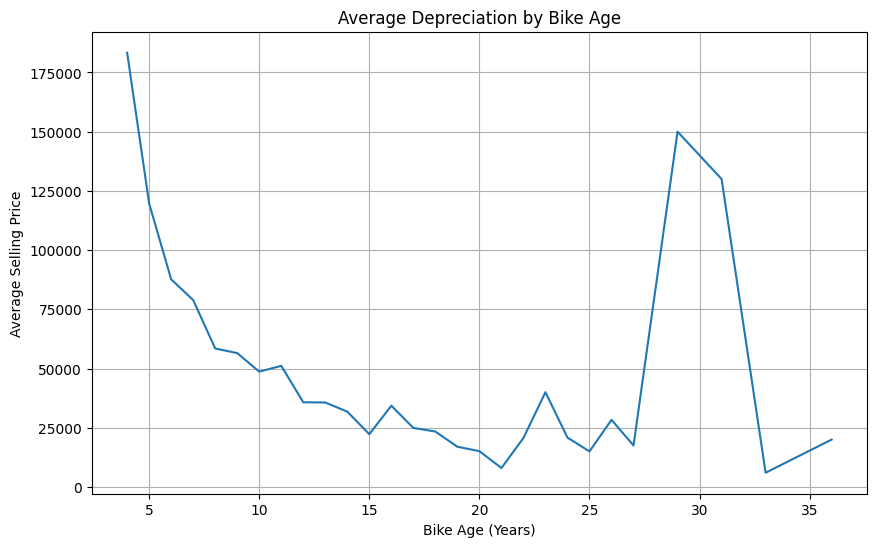

In [ ]:
# Calculate the age of each bike
current_year = 2024  # Replace with the current year
df['bike_age'] = current_year - df['year']

# Calculate the average depreciation for each age group
average_depreciation_by_age = df.groupby('bike_age')['selling_price'].mean()

# Print or visualize the results
print(average_depreciation_by_age)

# Example visualization (optional)
plt.figure(figsize=(10, 6))
plt.plot(average_depreciation_by_age.index, average_depreciation_by_age.values)
plt.xlabel("Bike Age (Years)")
plt.ylabel("Average Selling Price")
plt.title("Average Depreciation by Bike Age")
plt.grid(True)
plt.show()

Q14. Which bike names are priced significantly above the average price for their manufacturing year?

In [ ]:
# Calculate the average selling price for each year
average_price_by_year = df.groupby('year')['selling_price'].mean()

# Merge the average price back into the original DataFrame
df = pd.merge(df, average_price_by_year, on='year', suffixes=('', '_avg'))

# Identify bikes with prices significantly above the average for their year
# Define a threshold (e.g., 1.5 times the average price)
threshold = 1.5

significantly_above_average = df[df['selling_price'] > threshold * df['selling_price_avg']]

# Print the names of the bikes that meet the criteria
print(significantly_above_average['name'])

2       Royal Enfield Classic Gunmetal Grey
7      Royal Enfield Bullet 350 [2007-2011]
13                            Yamaha YZF R3
18      Royal Enfield Classic Gunmetal Grey
23                            Jawa Standard
                       ...                 
979               Royal Enfield Thunder 500
981               Royal Enfield Thunder 350
983               Royal Enfield Classic 350
984               Royal Enfield Classic 500
985               Royal Enfield Classic 500
Name: name, Length: 157, dtype: object


Q15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

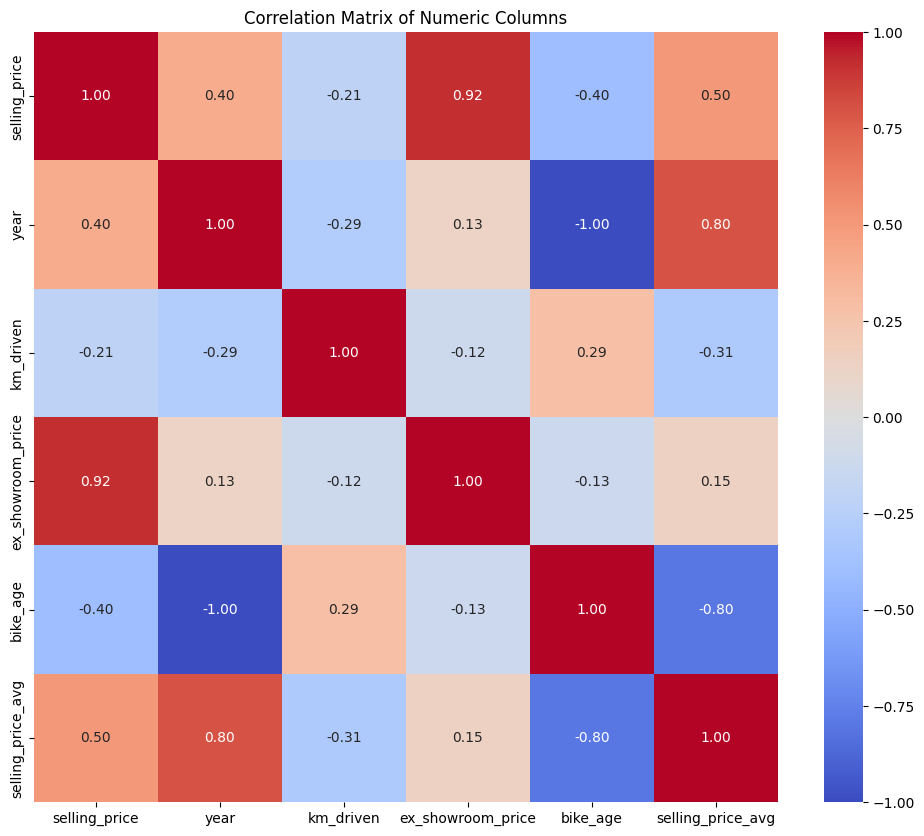

In [ ]:
# Select only numeric columns for correlation analysis
numeric_cols = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numeric_cols.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

# **EDA-2 Car Sale Dataset**

In [ ]:
file_path = '/content/Car Sale.csv'

import pandas as pd
df = pd.read_csv('/content/Car Sale.csv')
df

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


Q1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?

Dealer_Name
Buddy Storbeck's Diesel Service Inc                27217.261563
C & M Motors Inc                                   28111.755200
Capitol KIA                                        28189.703822
Chrysler Plymouth                                  27555.526400
Chrysler of Tri-Cities                             28123.091054
Classic Chevy                                      28602.014446
Clay Johnson Auto Sales                            27816.027113
Diehl Motor CO Inc                                 27993.929487
Enterprise Rent A Car                              28312.580800
Gartner Buick Hyundai Saab                         28247.621019
Hatfield Volkswagen                                27853.712242
Iceberg Rentals                                    28522.958533
McKinney Dodge Chrysler Jeep                       27684.096979
Motor Vehicle Branch Office                        27956.739617
Nebo Chevrolet                                     27818.889415
New Castle Ford Lincoln Merc

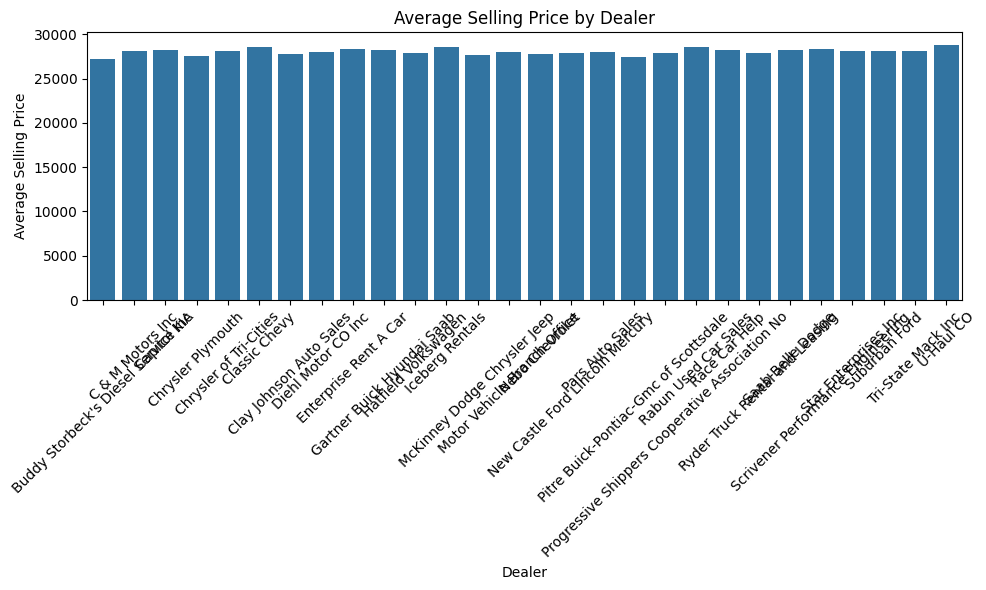

In [ ]:
# Calculate average selling price by dealer
# Replace 'Price' with the actual column name for selling price from your DataFrame (e.g., 'Selling_Price')
average_price_by_dealer = df.groupby('Dealer_Name')['Price ($)'].mean()

# Print results
print(average_price_by_dealer)

# Visualize comparison using bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=average_price_by_dealer.index, y=average_price_by_dealer.values)
plt.xlabel('Dealer')
plt.ylabel('Average Selling Price')
plt.title('Average Selling Price by Dealer')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout()  # Ensure labels fit within plot
plt.show()

Q2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing
trends?

In [ ]:
# prompt: Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing
# trends

# Calculate price variation for each car brand
price_variation_by_brand = df.groupby('Company')['Price ($)'].std()

# Find the brand with the highest variation
highest_variation_brand = price_variation_by_brand.idxmax()
highest_variation_value = price_variation_by_brand.max()

print(f"The car brand with the highest price variation is {highest_variation_brand} with a standard deviation of {highest_variation_value}.")

# Interpretation of pricing trends
print(f"\nA high price variation for {highest_variation_brand} suggests that this brand offers a wide range of models or configurations with significantly different prices.")
print("This could be due to various factors like engine size, features, trim levels, model year, and mileage.")
print("It might indicate a diverse product portfolio or possibly inconsistent pricing strategies.")

The car brand with the highest price variation is Lincoln with a standard deviation of 19658.050211265567.

A high price variation for Lincoln suggests that this brand offers a wide range of models or configurations with significantly different prices.
This could be due to various factors like engine size, features, trim levels, model year, and mileage.
It might indicate a diverse product portfolio or possibly inconsistent pricing strategies.


Q3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges
compare?

                count          mean           std     min      25%      50%  \
Transmission                                                                  
Auto          12571.0  28248.525972  13747.070597  1200.0  19000.0  24000.0   
Manual        11335.0  27914.710631  15862.871978  1700.0  17000.0  22001.0   

                  75%      max  
Transmission                    
Auto          35500.0  75700.0  
Manual        34000.0  85800.0  

Interquartile Ranges (IQR) by Transmission Type:
Transmission
Auto      16500.0
Manual    17000.0
dtype: float64


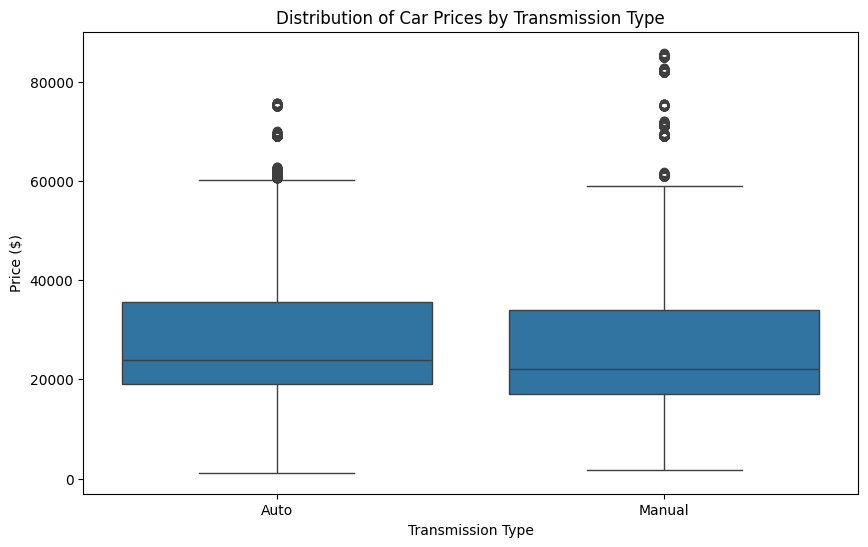

In [ ]:
# Group data by transmission type and calculate price statistics
price_stats_by_transmission = df.groupby('Transmission')['Price ($)'].describe()

# Extract IQR for each transmission type
iqr_by_transmission = price_stats_by_transmission['75%'] - price_stats_by_transmission['25%']

# Print the distribution statistics (including IQR)
print(price_stats_by_transmission)

# Print IQR comparison
print("\nInterquartile Ranges (IQR) by Transmission Type:")
print(iqr_by_transmission)

# Visualize the distribution of car prices for each transmission type using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Price ($)', data=df)
plt.title('Distribution of Car Prices by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price ($)')
plt.show()

Q4. What is the distribution of car prices across different regions

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')
                count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   

                   75%      max  
Dealer_Regi

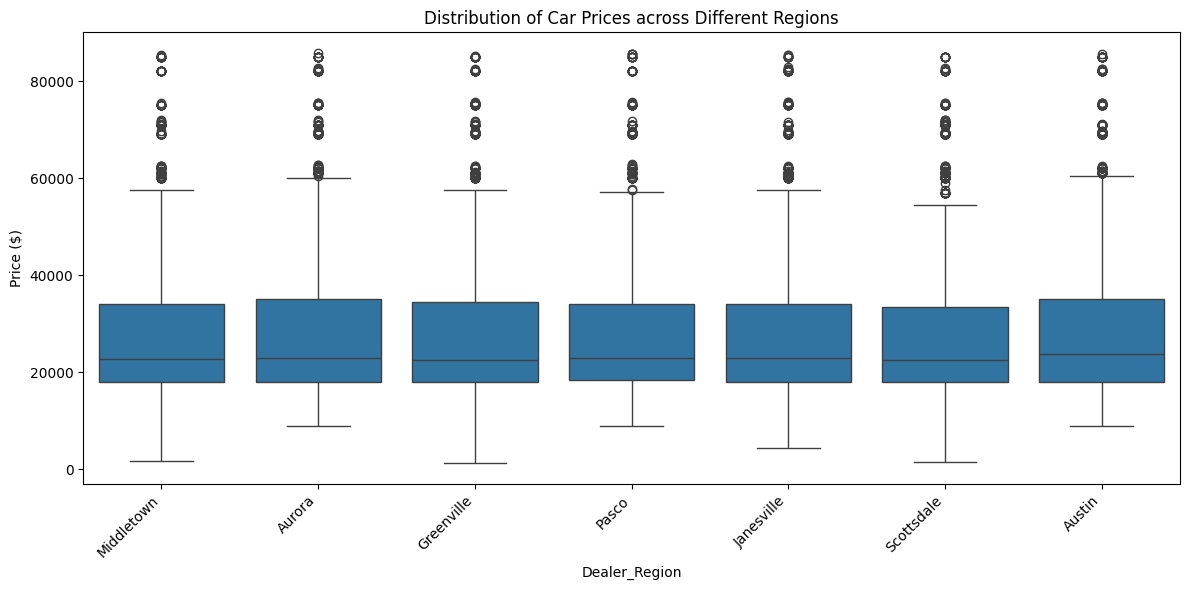

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Print the list of column names in your DataFrame
print(df.columns)

# Double-check the actual name of the column and update it in the groupby statement if necessary
# For example, if the column name is 'region' instead of 'Region', change it to:
# price_stats_by_region = df.groupby('region')['Price ($)'].describe()

# Group data by region and calculate price statistics
price_stats_by_region = df.groupby('Dealer_Region')['Price ($)'].describe()

# Print the distribution statistics for each region
print(price_stats_by_region)

# Visualize the distribution of car prices for each region using box plots
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
plt.title('Distribution of Car Prices across Different Regions')
plt.xlabel('Dealer_Region')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

Q5. What is the distribution of cars based on body styles?

Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


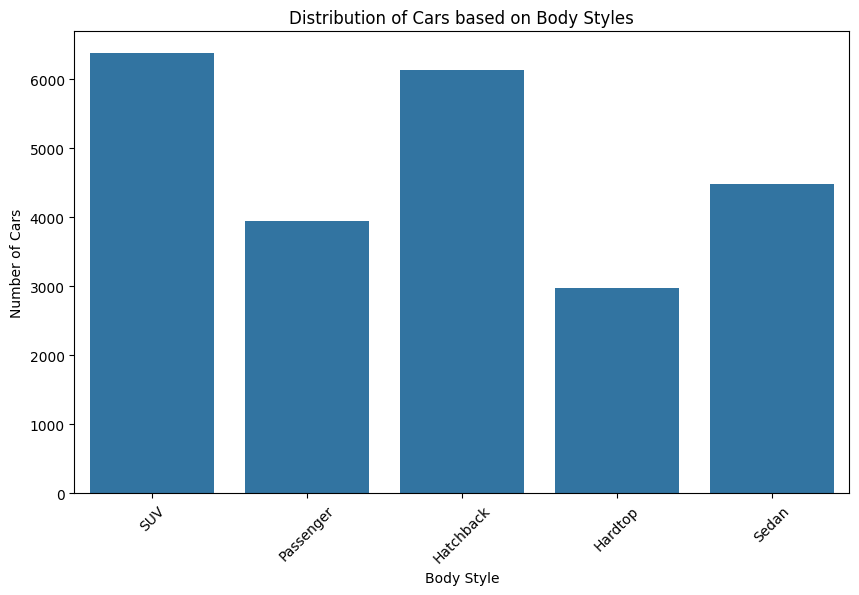

In [ ]:
# Calculate the distribution of cars based on body styles
body_style_counts = df['Body Style'].value_counts()

# Print the distribution
print(body_style_counts)

# Visualize the distribution using a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Body Style', data=df)
plt.title('Distribution of Cars based on Body Styles')
plt.xlabel('Body Style')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.show()

Q6. How does the average selling price of cars vary by customer gender and annual income?

Annual Income  10080         13500     24000     85000     106000    121000    \
Gender                                                                          
Female              NaN  28132.038732       NaN       NaN   46001.0   20000.0   
Male            22801.0  27809.493111   61001.0   43000.0       NaN       NaN   

Annual Income  131000    145000    160000    170000    ...  6125000   \
Gender                                                 ...             
Female              NaN       NaN       NaN       NaN  ...       NaN   
Male            17000.0   16500.0   18334.0   14500.0  ...   19501.0   

Annual Income  6240000   6400000   6460000   6500000   6600000   6800000   \
Gender                                                                      
Female          42000.0   32001.0   14000.0       NaN       NaN       NaN   
Male                NaN   71000.0       NaN   25000.0   39000.0   15000.0   

Annual Income  7650000   8000000   11200000  
Gender                         

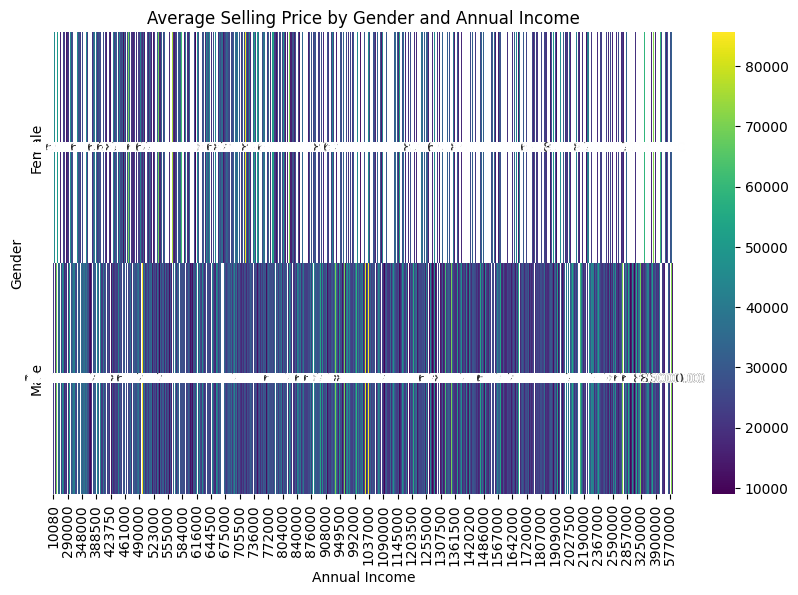

In [ ]:
# Assuming 'df' is your DataFrame and it contains columns 'Gender', 'Annual Income', and 'Price ($)'
# Check if the required columns exist in your DataFrame
required_columns = ['Gender', 'Annual Income', 'Price ($)']
if not all(col in df.columns for col in required_columns):
    print("Error: The DataFrame does not contain all required columns ('Gender', 'Annual Income', 'Price ($)')")
else:
    # Group data by gender and annual income, then calculate the average selling price
    average_price_by_gender_income = df.groupby(['Gender', 'Annual Income'])['Price ($)'].mean().unstack()

    # Print or visualize the results
    print(average_price_by_gender_income)

    # Example visualization using a heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(average_price_by_gender_income, annot=True, fmt=".2f", cmap="viridis")
    plt.title('Average Selling Price by Gender and Annual Income')
    plt.xlabel('Annual Income')
    plt.ylabel('Gender')
    plt.show()

Q7. What is the distribution of car prices by region, and how does the number of cars sold vary by region

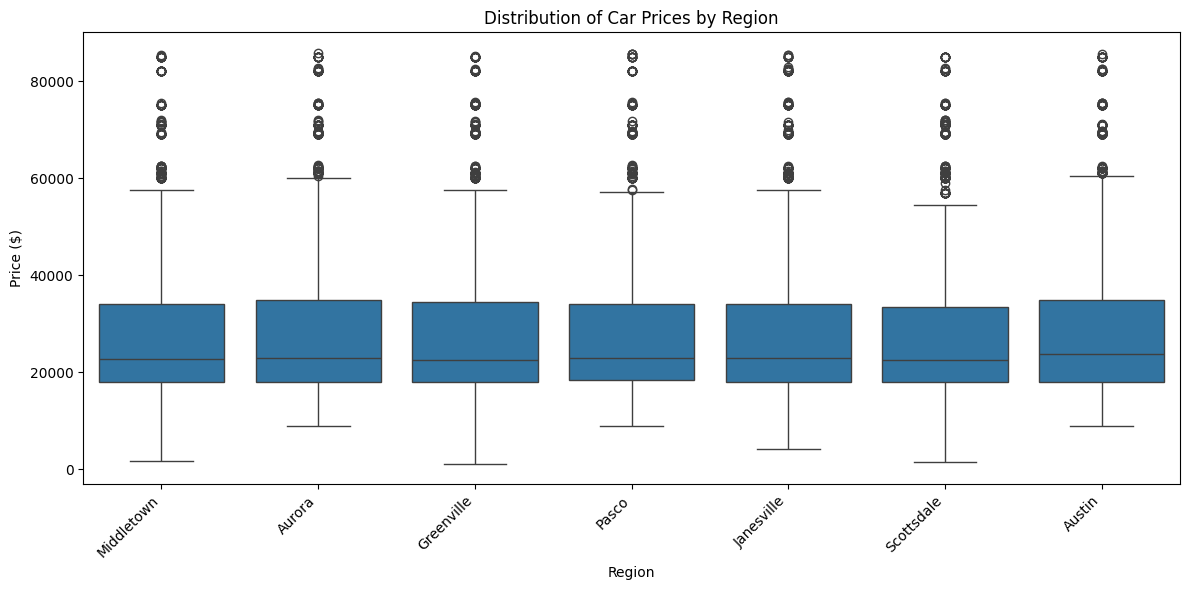


Number of Cars Sold by Region:
 Dealer_Region
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3130
Middletown    3128
Greenville    3128
Name: count, dtype: int64


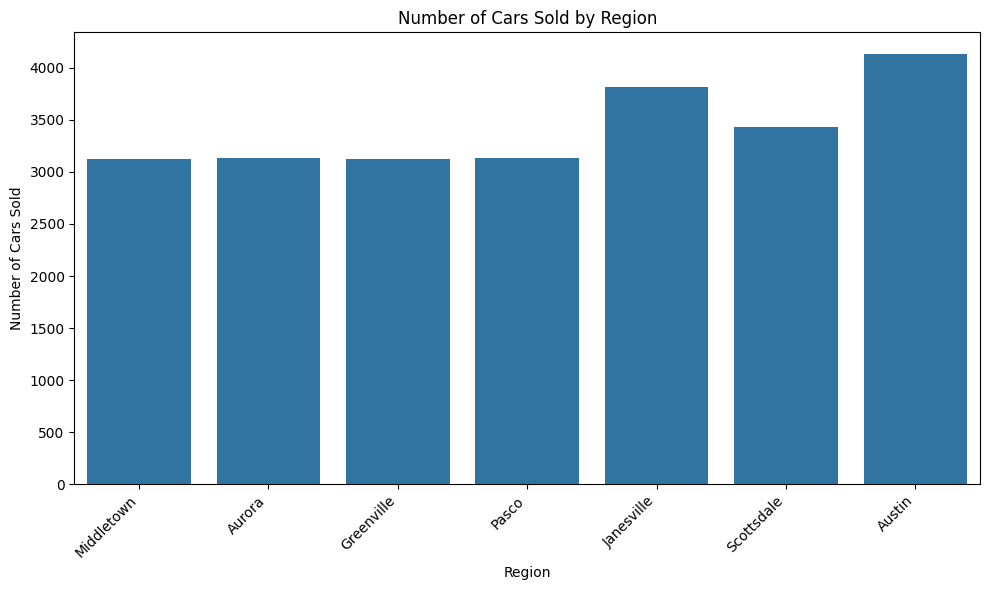

In [ ]:
# Assuming 'df' is your DataFrame and it contains columns 'Dealer_Region' and 'Price ($)'
# Check if the required columns exist
required_columns = ['Dealer_Region', 'Price ($)']
if not all(col in df.columns for col in required_columns):
    print("Error: 'Dealer_Region' or 'Price ($)' column not found in the DataFrame.")
else:
    # Distribution of car prices by region
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
    plt.title('Distribution of Car Prices by Region')
    plt.xlabel('Region')
    plt.ylabel('Price ($)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Number of cars sold by region
    cars_sold_by_region = df['Dealer_Region'].value_counts()
    print("\nNumber of Cars Sold by Region:\n", cars_sold_by_region)

    plt.figure(figsize=(10, 6))
    sns.countplot(x='Dealer_Region', data=df)
    plt.title('Number of Cars Sold by Region')
    plt.xlabel('Region')
    plt.ylabel('Number of Cars Sold')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Q8. How does the average car price differ between cars with different engine sizes

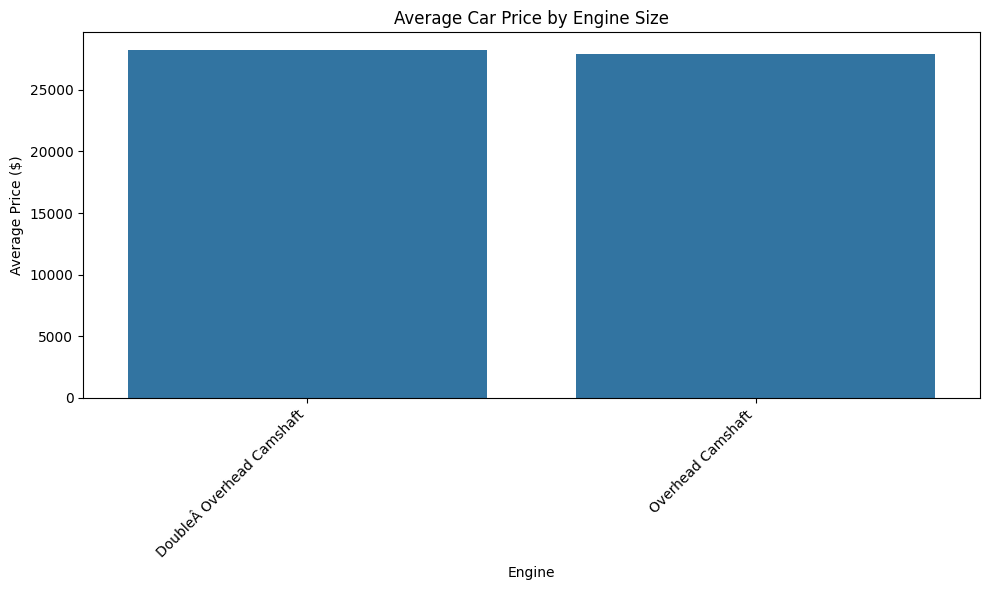

Average Car Price by Engine:
Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


In [ ]:
# Assuming 'df' is your DataFrame containing the car sale data
# and 'Engine_Size' and 'Price ($)' are the relevant columns

# 1. Group by Engine Size and Calculate Average Price:
average_price_by_engine_size = df.groupby('Engine')['Price ($)'].mean()

# 2. Visualize with a Bar Plot:
plt.figure(figsize=(10, 6))
sns.barplot(x=average_price_by_engine_size.index, y=average_price_by_engine_size.values)
plt.title('Average Car Price by Engine Size')
plt.xlabel('Engine')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# 3. Print the Average Prices:
print("Average Car Price by Engine:")
print(average_price_by_engine_size)

Q9. How do car prices vary based on the customer’s annual income bracket

<ipython-input-63-a14b7e60e3c3>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_price_by_income = df.groupby('Income Bracket')['Price ($)'].mean()


Income Bracket
0-25k       27884.297820
25k-50k              NaN
50k-75k              NaN
75k-100k    43000.000000
100k+       28147.761353
Name: Price ($), dtype: float64


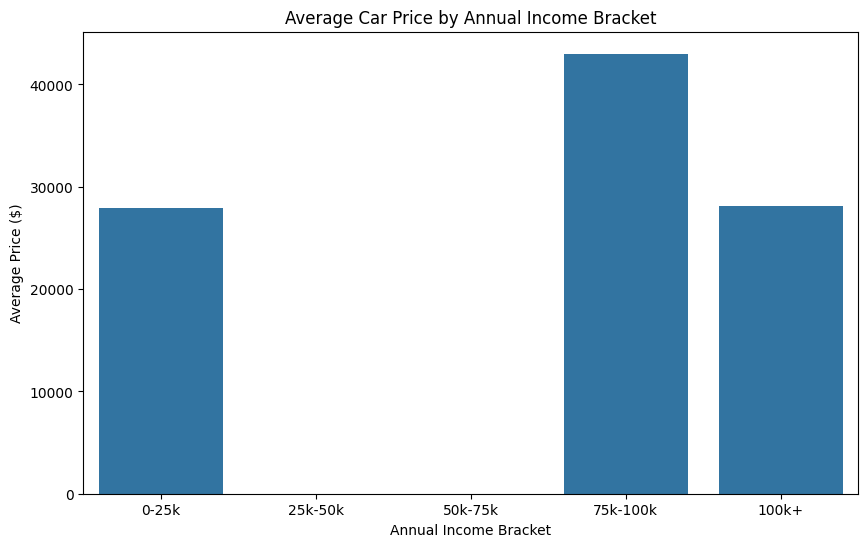

In [ ]:
# Assuming 'df' is your DataFrame and it contains columns 'Annual Income' and 'Price ($)'
# Check if the required columns exist
required_columns = ['Annual Income', 'Price ($)']
if not all(col in df.columns for col in required_columns):
    print("Error: 'Annual Income' or 'Price ($)' column not found in the DataFrame.")
else:
    # Create income brackets (you can adjust the bins as needed)
    income_brackets = [0, 25000, 50000, 75000, 100000, float('inf')]
    income_labels = ['0-25k', '25k-50k', '50k-75k', '75k-100k', '100k+']

    df['Income Bracket'] = pd.cut(df['Annual Income'], bins=income_brackets, labels=income_labels, right=False)

    # Group by income bracket and calculate average car price
    average_price_by_income = df.groupby('Income Bracket')['Price ($)'].mean()
    print(average_price_by_income)

    # Visualize the relationship using a bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=average_price_by_income.index, y=average_price_by_income.values)
    plt.title('Average Car Price by Annual Income Bracket')
    plt.xlabel('Annual Income Bracket')
    plt.ylabel('Average Price ($)')
    plt.show()

Q10. What are the top 5 car models with the highest number of sales, and how does their price distribution look

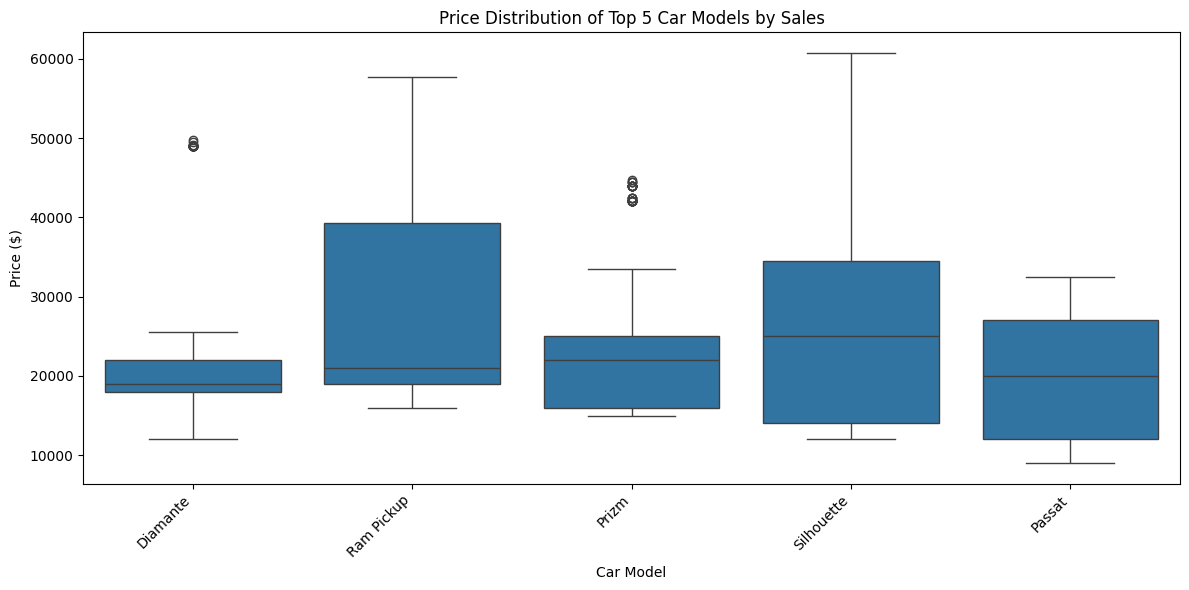

Top 5 Car Models by Sales:
- Diamante: 418 sales
- Silhouette: 411 sales
- Prizm: 411 sales
- Passat: 391 sales
- Ram Pickup: 383 sales


In [ ]:
# Assuming 'df' is your DataFrame containing the car sale data
# and 'Model' is the column representing the car model

# 1. Find Top 5 Car Models by Sales:
top_5_models = df['Model'].value_counts().head(5).index.tolist()

# 2. Filter DataFrame for Top 5 Models:
filtered_df = df[df['Model'].isin(top_5_models)]

# 3. Visualize Price Distribution:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Model', y='Price ($)', data=filtered_df)
plt.title('Price Distribution of Top 5 Car Models by Sales')
plt.xlabel('Car Model')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# 4. Print Top 5 Models and Their Sales Counts:
print("Top 5 Car Models by Sales:")
for model in top_5_models:
    sales_count = df['Model'].value_counts()[model]
    print(f"- {model}: {sales_count} sales")

Q11. How does car price vary with engine size across different car colors, and which colors have the highest price
variation

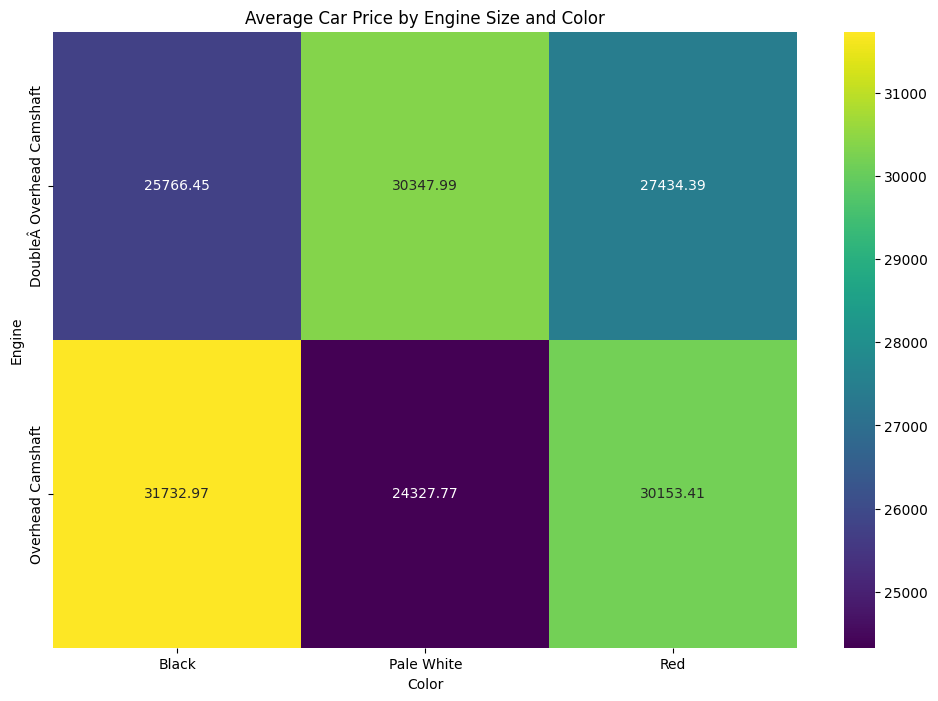

Price Variation by Color:
Color
Black         15286.065976
Pale White    14077.346859
Red           15519.360962
Name: Price ($), dtype: float64

Colors with Highest Price Variation:
Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price ($), dtype: float64


In [ ]:
# 1. Group by Engine Size and Color, then Calculate Average Price:
average_price_by_engine_color = df.groupby(['Engine', 'Color'])['Price ($)'].mean().unstack()

# 2. Visualize with a Heatmap:
plt.figure(figsize=(12, 8))
sns.heatmap(average_price_by_engine_color, annot=True, fmt=".2f", cmap="viridis")
plt.title('Average Car Price by Engine Size and Color')
plt.xlabel('Color')
plt.ylabel('Engine')
plt.show()

# 3. Calculate Price Variation for Each Color:
price_variation_by_color = df.groupby('Color')['Price ($)'].std()

# 4. Find Colors with Highest Price Variation:
highest_variation_colors = price_variation_by_color.nlargest(5)  # Get top 5 colors

# 5. Print Results:
print("Price Variation by Color:")
print(price_variation_by_color)
print("\nColors with Highest Price Variation:")
print(highest_variation_colors)

Q12. Is there any seasonal trend in car sales based on the date of sale

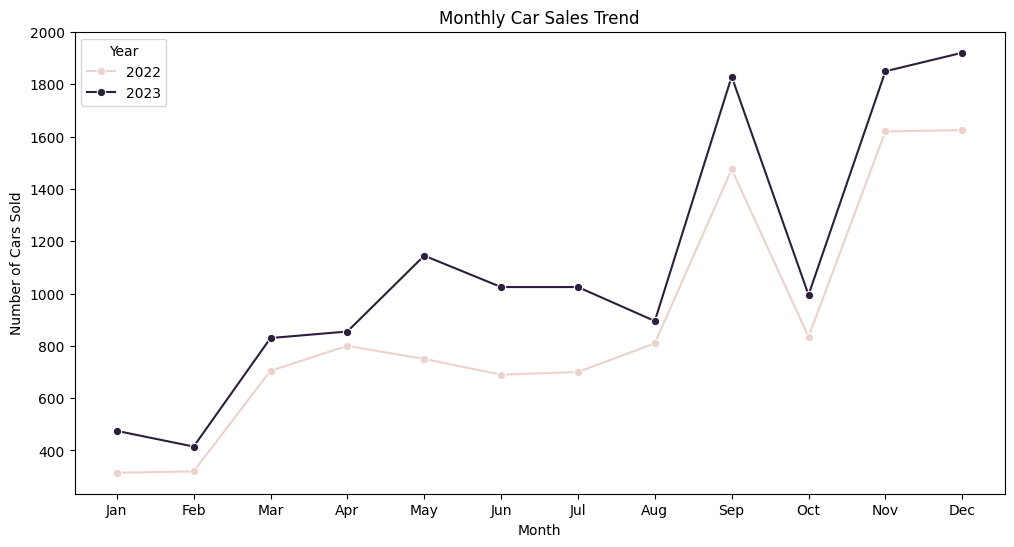

In [ ]:
# Assuming 'df' is your DataFrame with columns 'Date' and 'Price ($)'

# 1. Convert 'Date' to datetime:
df['Date'] = pd.to_datetime(df['Date'])

# 2. Extract Month and Year:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# 3. Group by Month and Year, then Calculate Average Price and Sales Count:
monthly_sales = df.groupby(['Year', 'Month'])['Price ($)'].agg(['mean', 'count'])
monthly_sales.columns = ['Average Price', 'Sales Count']
monthly_sales = monthly_sales.reset_index()

# 4. Visualize Monthly Trends:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Sales Count', data=monthly_sales, hue='Year', marker='o')
plt.title('Monthly Car Sales Trend')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

Q13. How does the car price distribution change when considering different combinations of body style and
transmission type

                          count          mean           std      min      25%  \
Body Style Transmission                                                         
Hardtop    Auto          1408.0  31520.188210  13687.756740  12000.0  21001.0   
           Manual        1563.0  27016.943698  14072.501848  11000.0  17575.5   
Hatchback  Auto          3458.0  25910.544824  13144.014337   4200.0  18001.0   
           Manual        2670.0  28702.550562  16284.049616   1700.0  17000.0   
Passenger  Auto          2020.0  28915.835149  13946.481932   9000.0  19000.0   
           Manual        1925.0  28969.521039  18523.684163  10000.0  16001.0   
SUV        Auto          3086.0  27501.404407  13299.927913   1200.0  19000.0   
           Manual        3288.0  26079.019161  14621.526541   2200.0  17000.0   
Sedan      Auto          2599.0  29955.294344  14310.910860  12000.0  19000.0   
           Manual        1889.0  29664.271572  15440.056434  11000.0  19001.0   

                           

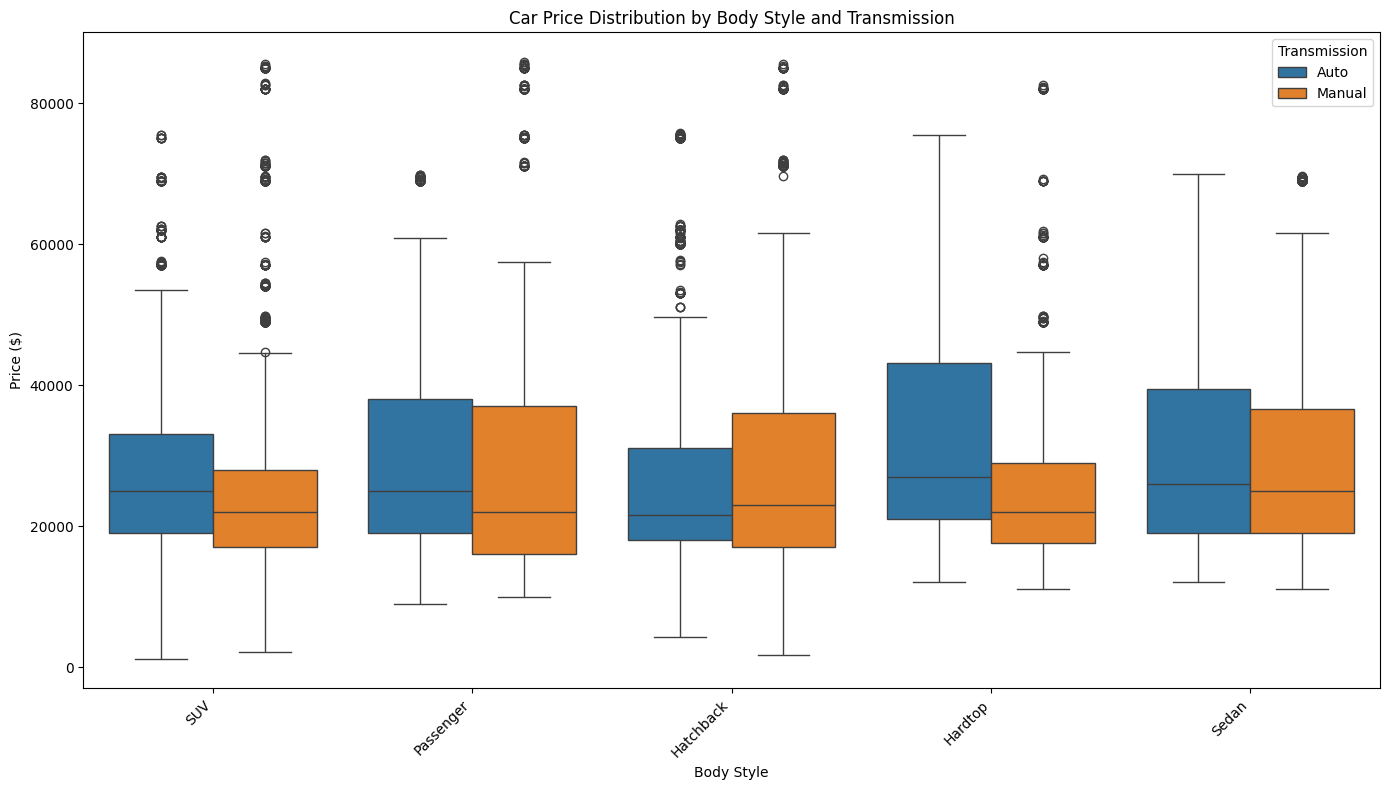

In [ ]:
# Assuming 'df' is your DataFrame with columns 'Body Style', 'Transmission', and 'Price ($)'

# 1. Group by Body Style and Transmission, then Calculate Price Statistics:
price_stats_by_body_transmission = df.groupby(['Body Style', 'Transmission'])['Price ($)'].describe()

# 2. Print Statistics:
print(price_stats_by_body_transmission)

# 3. Visualize with Box Plots:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df)
plt.title('Car Price Distribution by Body Style and Transmission')
plt.xlabel('Body Style')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Q14. What is the correlation between car price, engine size, and annual income of customers, and how do these
features interact

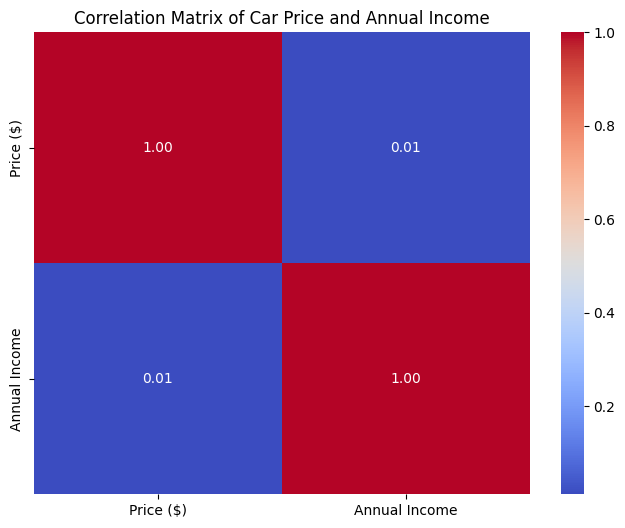

In [ ]:
# 1. Select Relevant Columns:
selected_features = df[['Price ($)', 'Annual Income']]  # Exclude 'Engine' column

# 2. Calculate Correlation Matrix:
correlation_matrix = selected_features.corr()

# 3. Visualize with Heatmap:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Car Price and Annual Income')  # Update title
plt.show()

Q15. How does the average car price vary across different car models and engine types

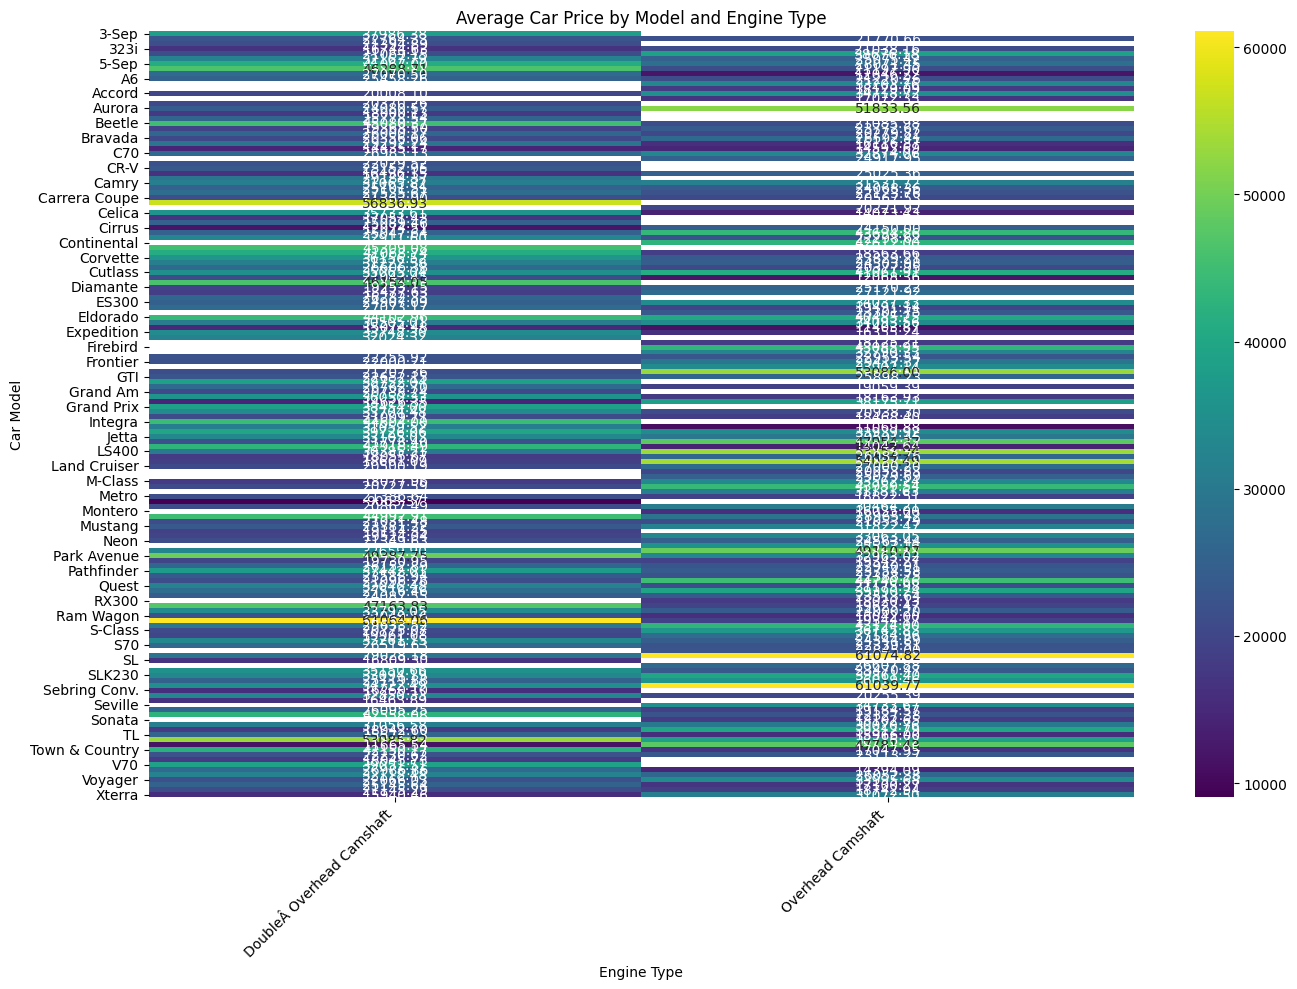

Average Car Price by Model and Engine:
Engine    DoubleÂ Overhead Camshaft  Overhead Camshaft
Model                                                 
3-Sep                  37986.380117                NaN
3000GT                 22764.326923       21770.659864
300M                   21394.888889                NaN
323i                   16744.632287       21038.162162
328i                   21069.149606       38676.177215
...                             ...                ...
Viper                  32118.479167       26052.375000
Voyager                22066.026316       33995.678322
Windstar               25145.636364       17100.272727
Wrangler               21145.294737       18742.942029
Xterra                 15940.459459       31072.500000

[154 rows x 2 columns]


In [ ]:
# 1. Group by Model and Engine, then Calculate Average Price:
average_price_by_model_engine = df.groupby(['Model', 'Engine'])['Price ($)'].mean().unstack()

# 2. Visualize with a Heatmap:
plt.figure(figsize=(14, 10))  # Adjust size as needed
sns.heatmap(average_price_by_model_engine, annot=True, fmt=".2f", cmap="viridis")
plt.title('Average Car Price by Model and Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Car Model')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# 3. Print the Average Prices (Optional):
print("Average Car Price by Model and Engine:")
print(average_price_by_model_engine)

# **EDA-3 Amazon Sales Data**

In [ ]:
file_path = '/content/amazon.csv'

import pandas as pd
data = pd.read_csv('/content/amazon.csv')
data

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

Q1. What is the average rating for each product category

In [ ]:
# Group by category and calculate the average rating
if 'category' in data.columns and 'rating' in data.columns:
    # Convert 'rating' column to numeric, handling errors
    data['rating'] = pd.to_numeric(data['rating'], errors='coerce')
    avg_ratings = data.groupby('category')['rating'].mean()
    print(avg_ratings)
else:
    print("The required columns 'category' and 'rating' are not in the dataset.")

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           4.050000
                                                                                                                            ...   
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens        4.250000
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSu

Q2. What are the top rating_count products by category

In [ ]:
# prompt: What are the top rating_count products by category

# Assuming 'data' is your DataFrame and it contains columns 'category', 'rating_count', and 'product_name'

# Group by category and sort by rating_count in descending order
top_products_by_category = data.groupby('category').apply(lambda x: x.sort_values('rating_count', ascending=False).head(5))

# Print the result
print(top_products_by_category[['product_name', 'rating_count']])

                                                                                              product_name  \
category                                                                                                     
Car&Motorbike|CarAccessories|InteriorAccessorie... 1157  Reffair AX30 [MAX] Portable Air Purifier for C...   
Computers&Accessories|Accessories&Peripherals|A... 695   rts [2 Pack] Mini USB C Type C Adapter Plug, T...   
                                                   742   Kanget [2 Pack] Type C Female to USB A Male Ch...   
Computers&Accessories|Accessories&Peripherals|A... 906   Hp Wired On Ear Headphones With Mic With 3.5 M...   
Computers&Accessories|Accessories&Peripherals|A... 772   HUMBLE Dynamic Lapel Collar Mic Voice Recordin...   
...                                                                                                    ...   
OfficeProducts|OfficePaperProducts|Paper|Statio... 858   Pilot V7 Liquid Ink Roller Ball Pen (2 Blue + ...   
OfficeProd

<ipython-input-9-a1926d5078e1>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_products_by_category = data.groupby('category').apply(lambda x: x.sort_values('rating_count', ascending=False).head(5))


Q3. What is the distribution of discounted prices vs. actual prices?

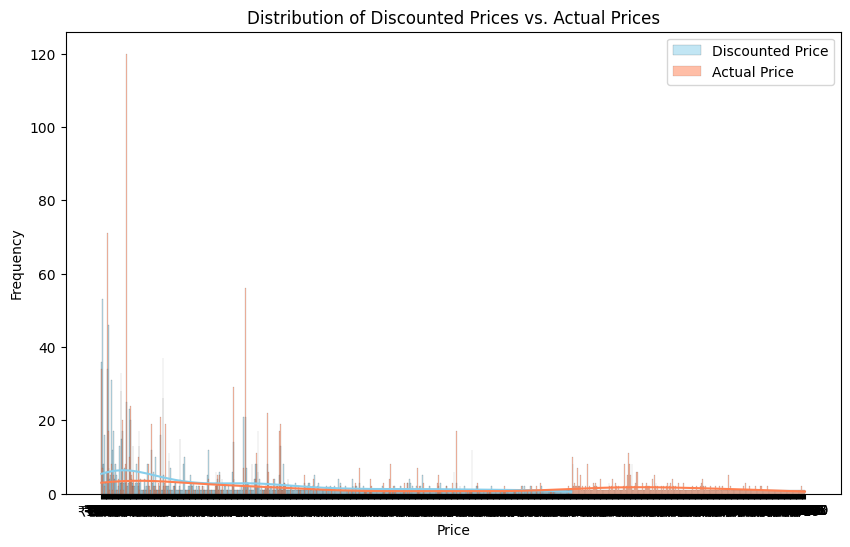

In [ ]:
# Assuming 'df' is your DataFrame and it contains columns 'actual_price' and 'discounted_price'
# Check if the required columns exist
required_columns = ['actual_price', 'discounted_price']
if not all(col in df.columns for col in required_columns):
    print("Error: 'actual_price' or 'discounted_price' column not found in the DataFrame.")
else:
    # Create a distribution plot
    plt.figure(figsize=(10, 6))
    sns.histplot(df['discounted_price'], kde=True, label='Discounted Price', color='skyblue')
    sns.histplot(df['actual_price'], kde=True, label='Actual Price', color='coral')
    plt.title('Distribution of Discounted Prices vs. Actual Prices')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

Q4. How does the average discount percentage vary across categories?

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                   NaN
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                  NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                          NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                       NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                          NaN
                                                                                                                          ..
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens       NaN
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPen

<ipython-input-33-86d818a1fb5d>:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


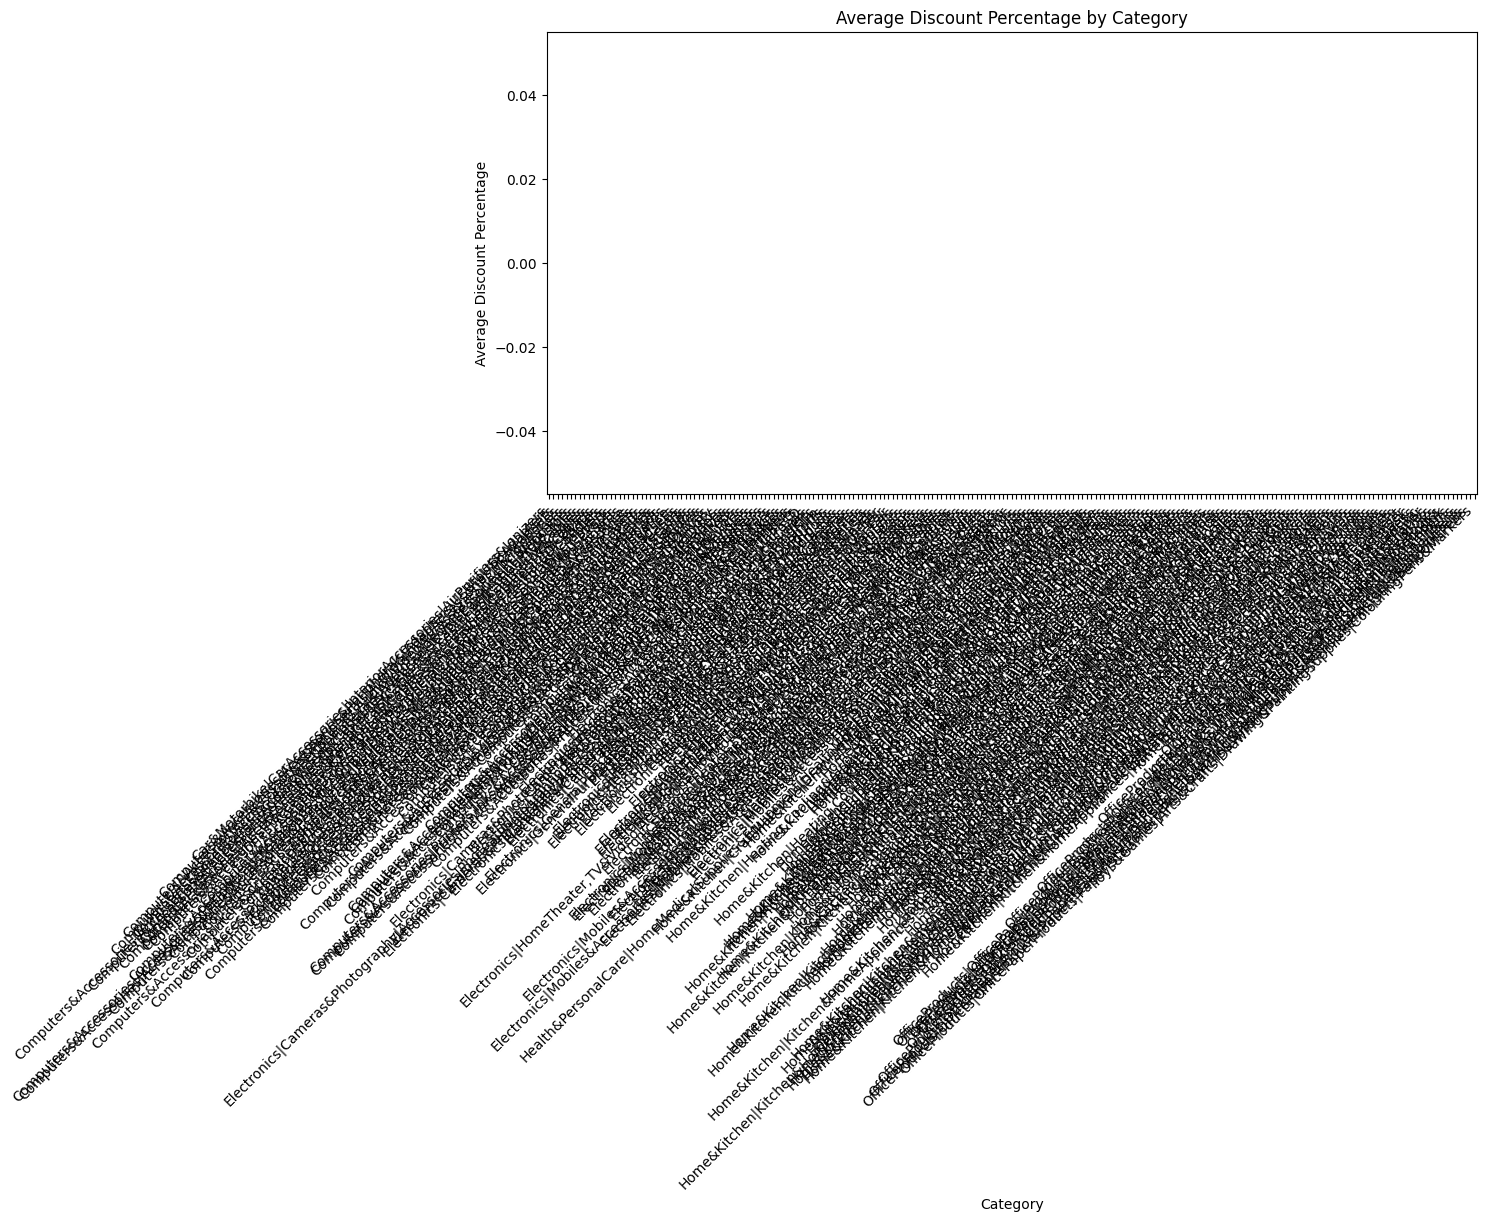

In [ ]:
# prompt: How does the average discount percentage vary across categories?

# Assuming 'data' is your DataFrame and it contains columns 'category', 'actual_price', and 'discounted_price'
# Check if the required columns exist
required_columns = ['category', 'actual_price', 'discounted_price']
if not all(col in data.columns for col in required_columns):
    print("Error: 'category', 'actual_price', or 'discounted_price' column not found in the DataFrame.")
else:
    # Calculate the discount percentage
    data['discount_percentage'] = ((data['actual_price'] - data['discounted_price']) / data['actual_price']) * 100

    # Group by category and calculate the average discount percentage
    average_discount_by_category = data.groupby('category')['discount_percentage'].mean()

    # Print the result
    print(average_discount_by_category)

    # Visualize the result (optional)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=average_discount_by_category.index, y=average_discount_by_category.values)
    plt.title('Average Discount Percentage by Category')
    plt.xlabel('Category')
    plt.ylabel('Average Discount Percentage')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Q5. What are the most popular product names

In [ ]:
# Assuming 'data' is your DataFrame and it contains a column named 'product_name'.
# Replace 'product_name' with the actual column name if it's different.

top_products = data['product_name'].value_counts().head(10)
top_products

,count
product_name,
"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution",5
"Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3"",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating",4
"Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)",3
MI Braided USB Type-C Cable for Charging Adapter (Red),3
"Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)",3
"Samsung Galaxy M13 5G (Aqua Green, 6GB, 128GB Storage) | 5000mAh Battery | Upto 12GB RAM with RAM Plus",3
"Amazon Basics USB Type-C to USB-A 2.0 Male Fast Charging Cable for Laptop - 3 Feet (0.9 Meters), Black",3
"boAt A400 USB Type-C to USB-A 2.0 Male Data Cable, 2 Meter (Black)",3
"Duracell USB C To Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black",3


Q6. What are the most popular product keywords

In [ ]:
# Assuming 'df1' is your DataFrame and it contains a column named 'product_name'.
# Replace 'product_name' with the actual column name if it's different.

# Assuming 'product_name' contains keywords separated by spaces or other delimiters
from collections import Counter

def extract_keywords(product_name):
    # Customize this to match the keyword delimiters in your data
    keywords = product_name.lower().split()  # Split by space
    return keywords

all_keywords = []
for name in data['product_name']:
    all_keywords.extend(extract_keywords(name))

keyword_counts = Counter(all_keywords)
top_keywords = keyword_counts.most_common(10)  # Get the top 10 keywords

top_keywords

[('with', 751),
 ('for', 672),
 ('|', 457),
 ('&', 432),
 ('usb', 377),
 ('and', 330),
 ('cable', 320),
 ('-', 220),
 ('charging', 219),
 ('to', 218)]

Q7. What are the most popular product reviews

In [ ]:
import pandas as pd
from collections import Counter

# Check if relevant columns exist
if {'review_title', 'rating_count', 'rating'}.issubset(data.columns):
    # Sort reviews by Helpful_Votes and Rating (descending order)
    popular_reviews = data.sort_values(by=['rating_count', 'rating'], ascending=False)

    # Display the top 10 most popular reviews
    print(popular_reviews[['review_title', 'rating_count', 'rating']].head(10))
else:
    print("The required columns ('review_title', 'rating_count', 'rating') are not in the dataset.")

                                           review_title rating_count  rating
1279  Decent product,doesn't pick up sand,Ok ok,Must...          992     NaN
750   Nice .,very good batteries received,Longtevity...          989     4.3
977   A Quality Sound-Signature but leaves craving f...       98,250     4.1
1059  Kettle is good but bottle is not good quality,...          976     3.7
32    Great Cable, Charging Speeds Could Be Better,G...          974     4.3
151   Great Cable, Charging Speeds Could Be Better,G...          974     4.3
823   Great Cable, Charging Speeds Could Be Better,G...          974     4.3
536   Worth Every Square Inch.,VFM, Plastic build. M...       97,175     4.1
918   Worth Every Square Inch.,VFM, Plastic build. M...       97,174     4.1
1301  Livpure water filter reviews,Good product,over...           97     4.3


Q8. What is the correlation between discounted_price and rating

The correlation between discounted_price and rating is: nan


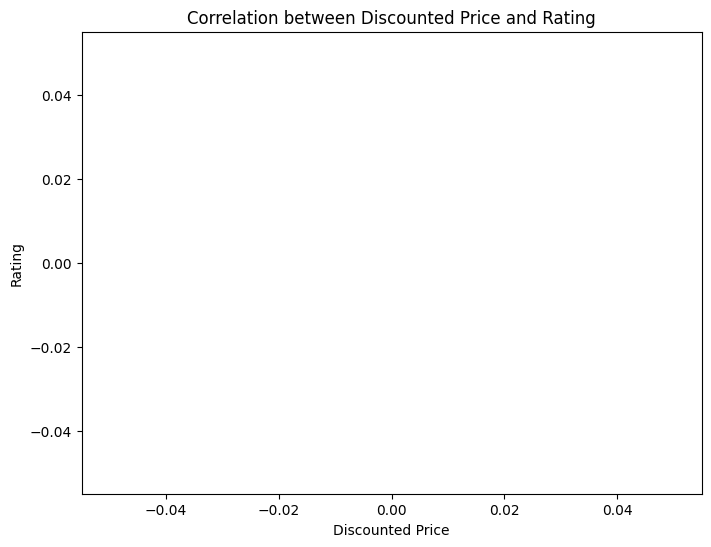

In [ ]:
# Assuming 'data' is your DataFrame and it contains columns 'discounted_price' and 'rating'
# Check if the required columns exist
import matplotlib.pyplot as plt # Import matplotlib.pyplot
import seaborn as sns
import pandas as pd


required_columns = ['discounted_price', 'rating']
if not all(col in data.columns for col in required_columns):
    print("Error: 'discounted_price' or 'rating' column not found in the DataFrame.")
else:
    # Convert 'discounted_price' to numeric, handling errors
    data['discounted_price'] = pd.to_numeric(data['discounted_price'].astype(str).str.replace(',', '', regex=False), errors='coerce')
    # Convert 'rating' to numeric, handling errors
    data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

    # Calculate the correlation
    correlation = data['discounted_price'].corr(data['rating'])

    # Print the correlation
    print(f"The correlation between discounted_price and rating is: {correlation}")

    # Visualize the relationship using a scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='discounted_price', y='rating', data=data)
    plt.title('Correlation between Discounted Price and Rating')
    plt.xlabel('Discounted Price')
    plt.ylabel('Rating')
    plt.show()

Q9. What are the Top 5 categories based on the highest ratings

In [ ]:
# Assuming 'data' is your DataFrame and it contains columns 'category' and 'rating'.
# Replace 'category' and 'rating' with the actual column names if they are different.

if {'category', 'rating'}.issubset(data.columns):
    # Convert 'rating' to numeric, handling errors
    data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

    # Group by category and calculate the average rating
    average_ratings_by_category = data.groupby('category')['rating'].mean()

    # Get the top 5 categories with the highest average ratings
    top_5_categories = average_ratings_by_category.nlargest(5)

    # Print the top 5 categories and their average ratings
    print(top_5_categories)
else:
    print("Error: 'category' or 'rating' column not found in the DataFrame.")

category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|Components|Memory                                     4.5
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating, dtype: float64


Q10. Identify any potential areas for improvement or optimization based on the data analysis

ANS-> # prompt: Identify any potential areas for improvement or optimization based on the data analysis

Potential areas for improvement and optimization:

 1. Data Cleaning and Preprocessing:
   - Handle missing values more systematically.  Instead of just dropping rows, consider imputation techniques (mean, median, mode) or more sophisticated methods based on the nature of the missing data.
    - Investigate and address inconsistencies or errors in the data.  For example, are there any unrealistic prices or ratings?  Outliers should be examined carefully, not automatically removed.
    - Feature engineering: Create new features that might be more informative. Examples include:
        - Price per unit of engine size.
        - Price difference between actual and discounted price as a percentage
        - Age of the car (if model year is available).
        - Categorize income into meaningful brackets (e.g., low, medium, high).
    - Data type consistency: Double check all data types, especially dates, numbers, and categories. Ensure dates are in the correct format for time-series analysis.

 2. Exploratory Data Analysis (EDA):
    - More detailed visualizations: Create scatter plots to explore relationships between numerical features. Consider using pair plots (sns.pairplot) to visualize relationships among multiple variables at once.
    - Deeper analysis of categorical variables:  Perform more detailed analysis of the categorical variables, such as 'Color', 'Transmission', 'Body Style'. Investigate if there are any significant differences in prices or sales.

 3. Statistical Analysis:
    - Hypothesis testing: Formulate hypotheses about relationships between variables and test them using appropriate statistical methods (t-tests, ANOVA, chi-squared tests).
    - Regression analysis: Explore linear or non-linear regression models to model the relationship between price and other predictor variables (engine size, income, etc.).

 4. Visualization Enhancements:
     - Improve plot labels and titles for clarity.
     - Use different color palettes for better visual distinction.
     - Add more informative annotations to visualizations.
     - Adjust the figure sizes for improved readability.

 5. Code Structure and Comments:
    - Add comments to explain the purpose of each section of the code.
    - Create functions to organize the analysis into reusable components.
    - Provide a more detailed narrative of findings in the comments or create a separate report.

 6. Addressing Specific Issues in the Analysis
    - Question 1 (Car Price Variation):  Instead of just standard deviation, use other measures of dispersion like the interquartile range (IQR) to better understand the spread of prices.
    - Question 6 (Customer Gender and Income): In addition to average price, look at other metrics like the median, to see if the means are representative.

 7. Data splitting: If building a predictive model, split the data into training, validation, and test sets for robust model evaluation.
 8. Model Evaluation:  When creating models, use appropriate evaluation metrics to quantify their performance.

 Example:  A more robust way to calculate the price variation could involve:
 import pandas as pd

 def price_variation_by_group(df, group_column, price_column):
   """Calculates IQR and standard deviation of price for each group."""
   variation_stats = df.groupby(group_column)[price_column].agg(['std', lambda x: x.quantile(0.75) - x.quantile(0.25)])
   variation_stats.columns = ['Standard Deviation', 'Interquartile Range']
   return variation_stats

 price_variation = price_variation_by_group(df, 'Company', 'Price')
 print(price_variation)


# **EDA - 4  Spotify Data**

In [ ]:
file_path = '/content/spotify.csv'

import pandas as pd
spotify_data = pd.read_csv('/content/spotify.csv')
spotify_data

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


Q1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
the needful

In [ ]:
# prompt: Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
# the needful

# Check for null values
print(df.isnull().sum())

# Handle null values (example: fill with mean for numerical columns)
for col in df.select_dtypes(include=np.number):
    df[col] = df[col].fillna(df[col].mean())

# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")

# Handle duplicate rows (example: drop duplicates)
df.drop_duplicates(inplace=True)

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Number of duplicate rows: 27


Q2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

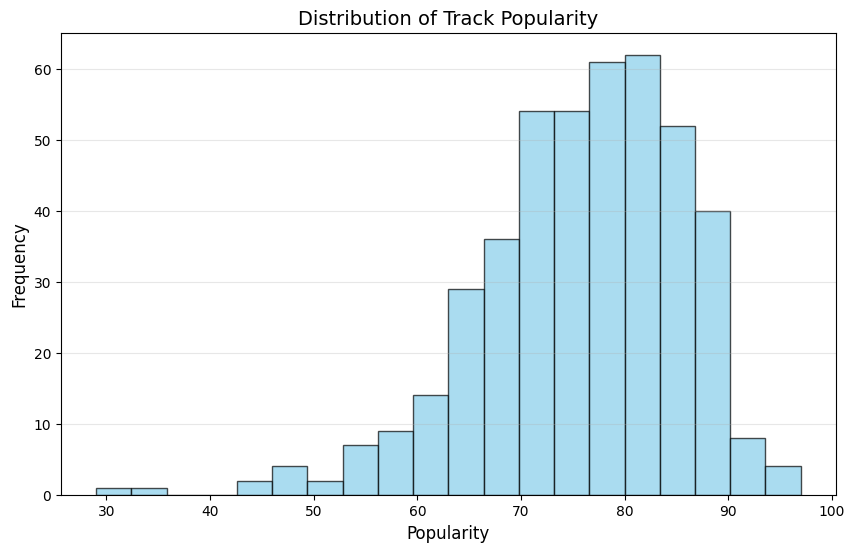

In [ ]:
import matplotlib.pyplot as plt

# Create a histogram for the popularity distribution
plt.figure(figsize=(10, 6))
plt.hist(spotify_data['Popularity'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Track Popularity', fontsize=14)
plt.xlabel('Popularity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

Q3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot

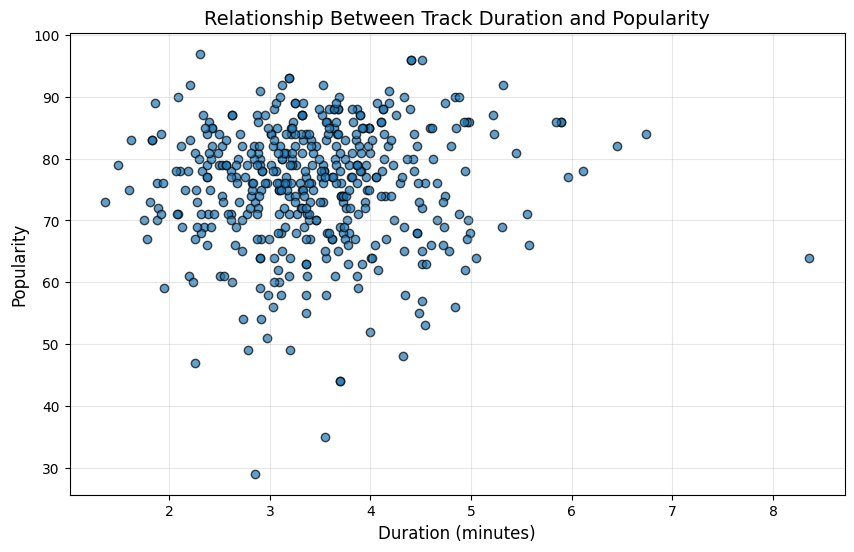

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

spotify_data['Duration (min)'] = spotify_data['Duration (ms)'] / 60000

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(spotify_data['Duration (min)'], spotify_data['Popularity'], alpha=0.7, edgecolors='k')
plt.title('Relationship Between Track Duration and Popularity', fontsize=14)
plt.xlabel('Duration (minutes)', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

Q4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
a countplot

<ipython-input-39-b530e7eb4694>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=spotify_data['Artist'], order=spotify_data['Artist'].value_counts().index, palette='viridis')


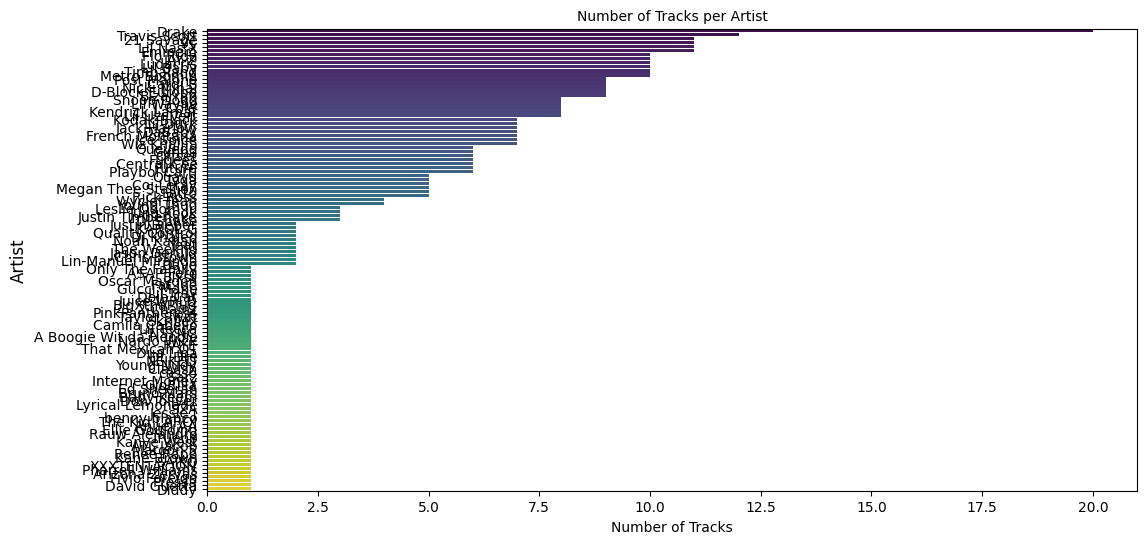

The artist with the highest number of tracks is 'Drake' with 20 tracks.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of tracks for each artist
artist_track_counts = spotify_data['Artist'].value_counts()

# Identify the artist with the most tracks
most_tracks_artist = artist_track_counts.idxmax()
most_tracks_count = artist_track_counts.max()

# Create a countplot
plt.figure(figsize=(12, 6))
sns.countplot(y=spotify_data['Artist'], order=spotify_data['Artist'].value_counts().index, palette='viridis')
plt.title('Number of Tracks per Artist', fontsize=10)
plt.xlabel('Number of Tracks', fontsize=10)
plt.ylabel('Artist', fontsize=12)
plt.show()

# Display the artist with the highest track count
print(f"The artist with the highest number of tracks is '{most_tracks_artist}' with {most_tracks_count} tracks.")


Q5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each

In [ ]:
# Sort the dataset by the Popularity column in ascending order
least_popular_tracks = spotify_data.sort_values(by='Popularity', ascending=True).head(5)

# Select and display the artist name and track name for the least popular tracks
least_popular_tracks[['Artist', 'Track Name', 'Popularity']]


,Artist,Track Name,Popularity
207,Pressa,Attachments (feat. Coi Leray),29
231,Justin Bieber,Intentions,35
435,French Montana,Splash Brothers,44
413,French Montana,Splash Brothers,44
225,Lil Baby,On Me - Remix,47


Q6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
display the average popularity for each artist.

In [ ]:
# Calculate the average popularity for each artist
artist_avg_popularity = spotify_data.groupby('Artist')['Popularity'].mean()

# Identify the top 5 artists with the highest average popularity
top_5_artists = artist_avg_popularity.sort_values(ascending=False).head(5)

# Display the average popularity for the top 5 artists
top_5_artists_df = top_5_artists.reset_index()
top_artist = top_5_artists.idxmax()
top_avg_popularity = top_5_artists.max()

# Calculate the average popularity for each artist
artist_avg_popularity = spotify_data.groupby('Artist')['Popularity'].mean()

# Identify the top 5 artists with the highest average popularity
top_5_artists = artist_avg_popularity.sort_values(ascending=False).head(5)

# Display the average popularity for the top 5 artists
top_5_artists_df = top_5_artists.reset_index()
top_artist = top_5_artists.idxmax()
top_avg_popularity = top_5_artists.max()

print("Top 5 Artists with Highest Average Popularity:")
print(top_5_artists_df)
print(f"\nArtist with the highest average popularity: {top_artist}")

Top 5 Artists with Highest Average Popularity:
         Artist  Popularity
0         cassö   92.000000
1        Trueno   89.000000
2  David Guetta   87.000000
3  Travis Scott   87.000000
4            ¥$   86.090909

Artist with the highest average popularity: cassö


Q7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist

In [ ]:
# Calculate the average popularity for each artist
artist_avg_popularity = spotify_data.groupby('Artist')['Popularity'].mean()

# Identify the top 5 artists with the highest average popularity
top_5_artists = artist_avg_popularity.sort_values(ascending=False).head(5).index

# Filter the dataset to include only the top 5 artists
top_5_artist_tracks = spotify_data[spotify_data['Artist'].isin(top_5_artists)]

# Identify the most popular track for each artist
most_popular_tracks = top_5_artist_tracks.loc[top_5_artist_tracks.groupby('Artist')['Popularity'].idxmax()]

# Select and display the artist name and their most popular track
most_popular_tracks[['Artist', 'Track Name', 'Popularity']]


,Artist,Track Name,Popularity
200,David Guetta,Baby Don't Hurt Me,87
30,Travis Scott,FE!N (feat. Playboi Carti),93
241,Trueno,Mamichula - con Nicki Nicole,89
140,cassö,Prada,92
260,¥$,CARNIVAL,96


Q8. Visualize relationships between multiple numerical variables simultaneously using a pair plot

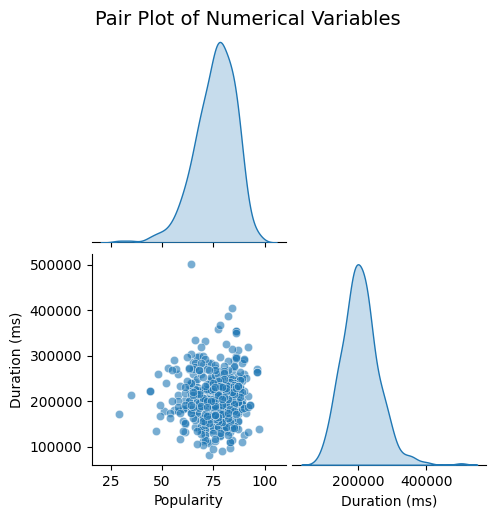

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns from the dataset
numerical_columns = ['Popularity', 'Duration (ms)']

# Create a pair plot
sns.pairplot(spotify_data[numerical_columns], diag_kind='kde', corner=True, plot_kws={'alpha': 0.6})
plt.suptitle('Pair Plot of Numerical Variables', y=1.02, fontsize=14)
plt.show()


Q9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or
violin plot

<ipython-input-130-5115447790a7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Duration (min)'] = filtered_data['Duration (ms)'] / 60000
<ipython-input-130-5115447790a7>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data, x='Artist', y='Duration (min)', palette='Set3')


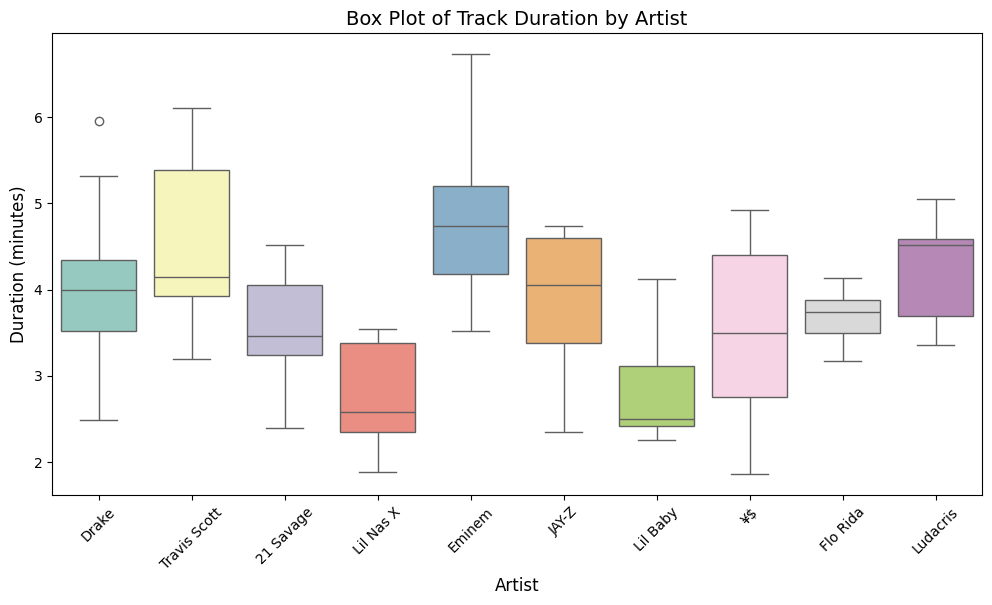

<ipython-input-130-5115447790a7>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered_data, x='Artist', y='Duration (min)', palette='muted')


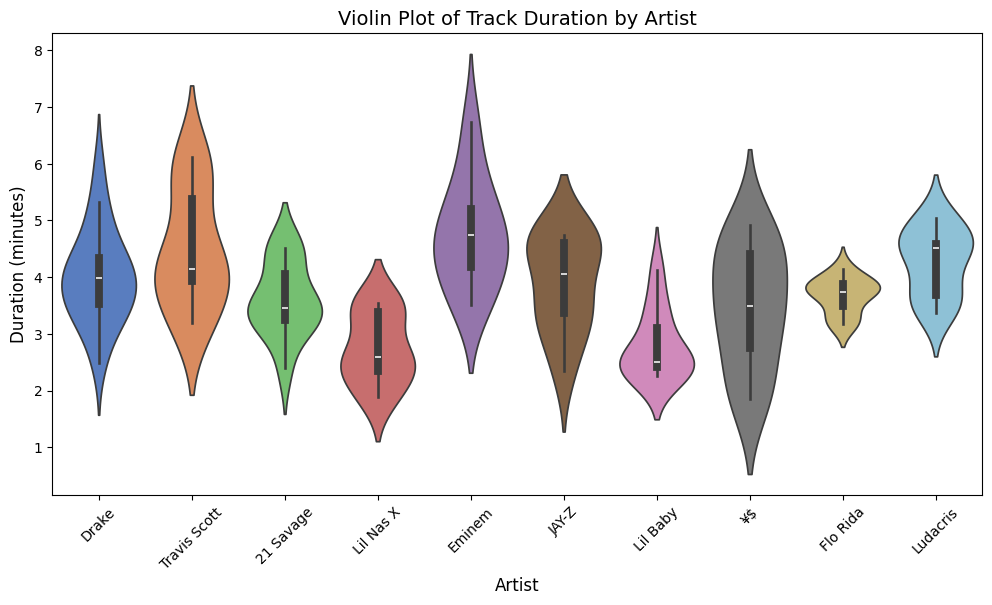

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataset to include only the top 10 artists with the most tracks for better visualization
top_artists = spotify_data['Artist'].value_counts().head(10).index
filtered_data = spotify_data[spotify_data['Artist'].isin(top_artists)]

# Convert duration from milliseconds to minutes
filtered_data['Duration (min)'] = filtered_data['Duration (ms)'] / 60000

# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data, x='Artist', y='Duration (min)', palette='Set3')
plt.xticks(rotation=45)
plt.title('Box Plot of Track Duration by Artist', fontsize=14)
plt.xlabel('Artist', fontsize=12)
plt.ylabel('Duration (minutes)', fontsize=12)
plt.show()

# Violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=filtered_data, x='Artist', y='Duration (min)', palette='muted')
plt.xticks(rotation=45)
plt.title('Violin Plot of Track Duration by Artist', fontsize=14)
plt.xlabel('Artist', fontsize=12)
plt.ylabel('Duration (minutes)', fontsize=12)
plt.show()


Q10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
violin plot.

<ipython-input-131-7c736e0af2ee>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=filtered_data, x='Artist', y='Popularity', palette='coolwarm', alpha=0.8)


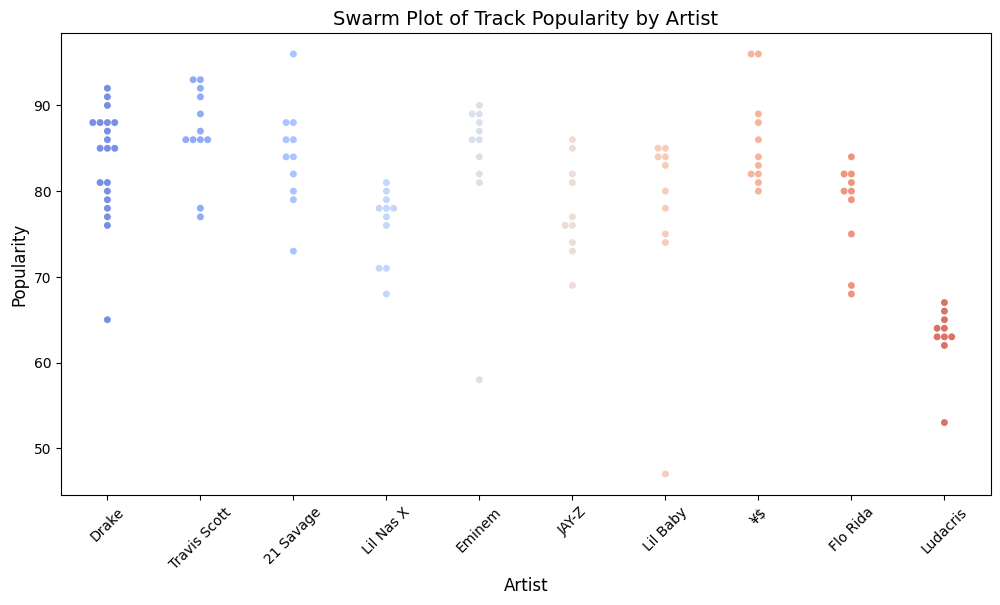

<ipython-input-131-7c736e0af2ee>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered_data, x='Artist', y='Popularity', palette='muted', inner='box')


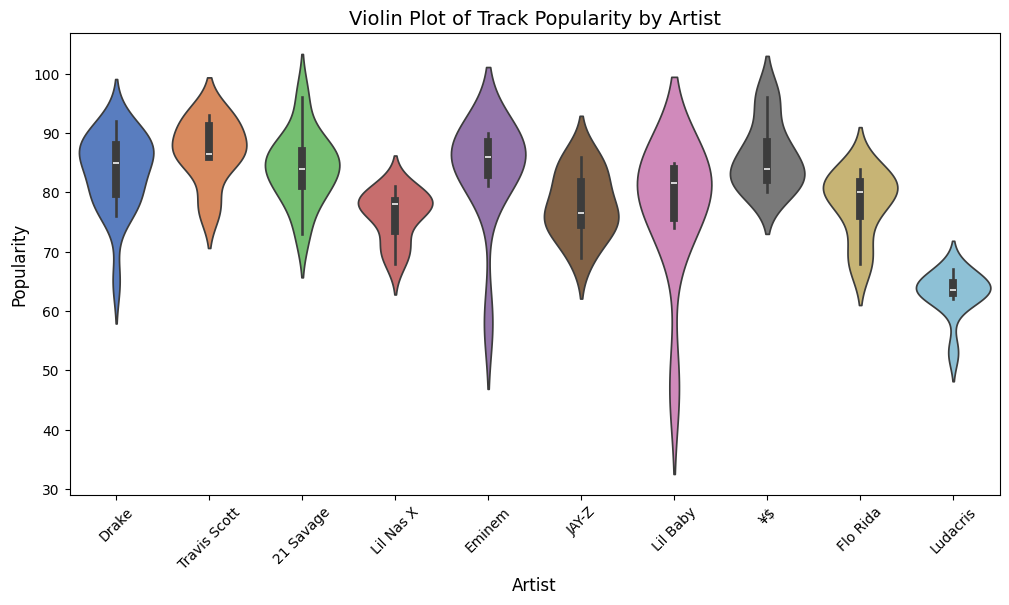

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataset to include only the top 10 artists with the most tracks for better visualization
top_artists = spotify_data['Artist'].value_counts().head(10).index
filtered_data = spotify_data[spotify_data['Artist'].isin(top_artists)]

# Swarm plot
plt.figure(figsize=(12, 6))
sns.swarmplot(data=filtered_data, x='Artist', y='Popularity', palette='coolwarm', alpha=0.8)
plt.xticks(rotation=45)
plt.title('Swarm Plot of Track Popularity by Artist', fontsize=14)
plt.xlabel('Artist', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.show()

# Violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=filtered_data, x='Artist', y='Popularity', palette='muted', inner='box')
plt.xticks(rotation=45)
plt.title('Violin Plot of Track Popularity by Artist', fontsize=14)
plt.xlabel('Artist', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.show()
